In [1]:
from src.cnc import CNC, simulate_from_distribution
from src.utils import * #, qutip_simuation
from src.vertex_decomposition import find_vertex_decomposition, find_cnc_vertex_decomposition
import matplotlib.pyplot as plt;

In [2]:
from src.utils import load_all_maximal_cncs_matrix

all_cncs_2 = load_all_maximal_cncs_matrix(2)
all_cncs_3 = load_all_maximal_cncs_matrix(3)

# Example 1: Computing a Boolean function

## Quantum circuit via Qiskit:

In [10]:
outcome_counts = run_boolean_function()
xor_counts = [xor_frequencies(outcomes) for outcomes in outcome_counts]

Quantum circuit for inputs (0,0)
     ┌───┐   ┌─────┐ ┌───┐ ┌─┐           
q_0: ┤ H ├─■─┤ Sdg ├─┤ H ├─┤M├───────────
     ├───┤ │ └─────┘ ├───┤ └╥┘┌─┐        
q_1: ┤ H ├─■────■────┤ H ├──╫─┤M├────────
     ├───┤      │   ┌┴───┴┐ ║ └╥┘┌───┐┌─┐
q_2: ┤ H ├──────■───┤ Sdg ├─╫──╫─┤ H ├┤M├
     └───┘          └─────┘ ║  ║ └───┘└╥┘
c: 3/═══════════════════════╩══╩═══════╩═
                            0  1       2  

Quantum circuit for inputs (0,1)
     ┌───┐   ┌─────┐ ┌───┐ ┌─┐        
q_0: ┤ H ├─■─┤ Sdg ├─┤ H ├─┤M├────────
     ├───┤ │ └─────┘┌┴───┴┐└╥┘┌───┐┌─┐
q_1: ┤ H ├─■────■───┤ Sdg ├─╫─┤ H ├┤M├
     ├───┤      │   └─┬─┬─┘ ║ └───┘└╥┘
q_2: ┤ H ├──────■─────┤M├───╫───────╫─
     └───┘            └╥┘   ║       ║ 
c: 3/══════════════════╩════╩═══════╩═
                       2    0       1  

Quantum circuit for inputs (1,0)
     ┌───┐      ┌─┐        
q_0: ┤ H ├─■────┤M├────────
     ├───┤ │    └╥┘┌───┐┌─┐
q_1: ┤ H ├─■──■──╫─┤ H ├┤M├
     ├───┤    │  ║ └┬─┬┘└╥┘
q_2: ┤ H ├────■──╫──┤M├──╫─


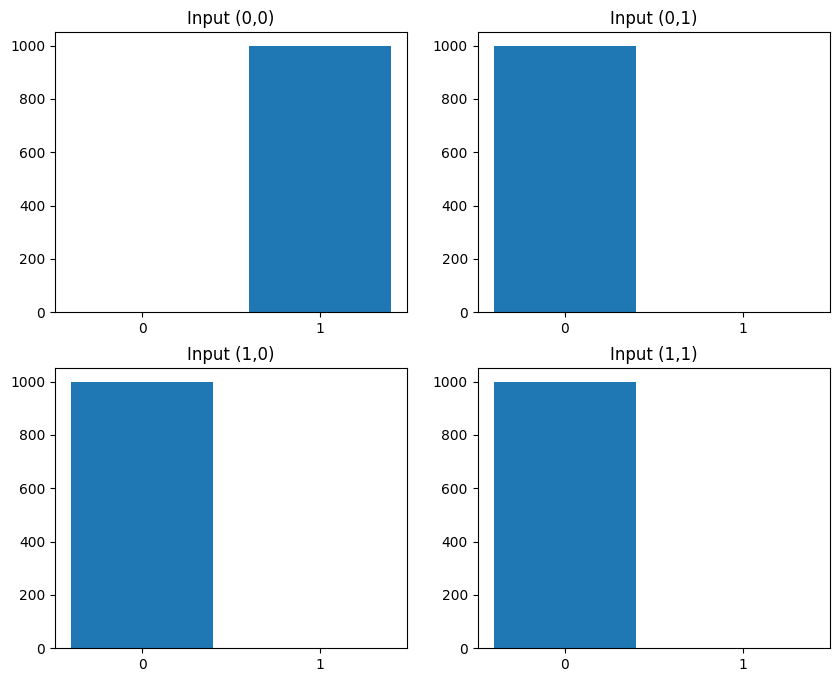

In [5]:
# Plot results:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
ax = [[x,y] for x in [0,1] for y in [0,1]]

for i in range(4):
    # Plot histograms
    axs[ax[i][0], ax[i][1]].bar(xor_counts[i][0], xor_counts[i][1])
    axs[ax[i][0], ax[i][1]].set_title(f'Input ({ax[i][0]},{ax[i][1]})')

# Show plot
plt.show()

## CNC-based Magic Simulation

In [6]:
QuantumState = CNC({
    Pauli("III"): 0,
    Pauli("XZI"): 0,
    Pauli("IZX"): 0,
    Pauli("ZXZ"): 0,
    Pauli("YYZ"): 0,
    Pauli("ZYY"): 0,
    Pauli("XIX"): 0,
    Pauli("YXY"): 1
})

In [7]:
sequences = [
    [Pauli("YII"),Pauli("IXI"),Pauli("IIY")],
    [Pauli("YII"),Pauli("IYI"),Pauli("IIZ")],
    [Pauli("ZII"),Pauli("IXI"),Pauli("IIZ")],
    [Pauli("ZII"),Pauli("IYI"),Pauli("IIY")]
]

In [9]:
# Initialize simulation:
initial_distribution = {QuantumState: 1}; shots = 1000
outcome_counts = [simulate_from_distribution(initial_distribution, sequences[m], shots) for m in range(len(sequences))]
xor_counts = [xor_frequencies(outcomes) for outcomes in outcome_counts]

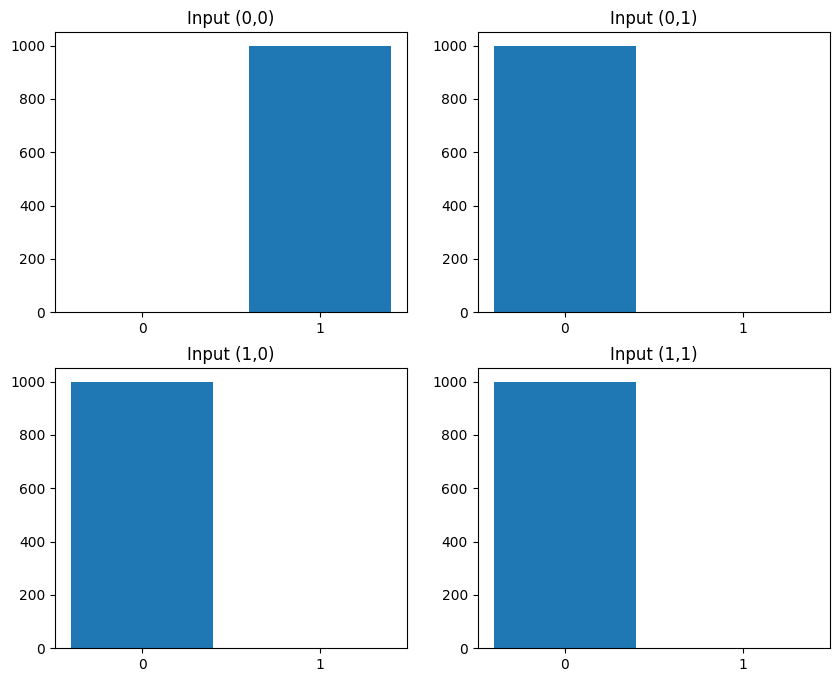

In [11]:
# Plot results:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
ax = [[x,y] for x in [0,1] for y in [0,1]]

for i in range(4):
    # Plot histograms
    axs[ax[i][0], ax[i][1]].bar(xor_counts[i][0], xor_counts[i][1])
    axs[ax[i][0], ax[i][1]].set_title(f'Input ({ax[i][0]},{ax[i][1]})')

# Show plot
plt.show()

## CNC-based Magic Simulation

In [12]:
CNC1 = CNC({
    Pauli("III"): 0,
    Pauli("XZI"): 0,
    Pauli("ZXZ"): 0,
    Pauli("YYZ"): 0,
    Pauli("IZX"): 0,
    Pauli("ZYY"): 0,
    Pauli("XIX"): 0,
    Pauli("YXY"): 1,
    Pauli("IIZ"): 0,
    Pauli("XZZ"): 0,
    Pauli("ZXI"): 0,
    Pauli("YYI"): 0,
    Pauli("IZY"): 0,
    Pauli("XIY"): 0,
    Pauli("ZYX"): 1,
    Pauli("YXX"): 0,
})

In [15]:
CNC2 = CNC({
    Pauli("III"): 0,
    Pauli("XZI"): 0,
    Pauli("ZXZ"): 0,
    Pauli("YYZ"): 0,
    Pauli("IZX"): 0,
    Pauli("ZYY"): 0,
    Pauli("XIX"): 0,
    Pauli("YXY"): 1,
    Pauli("IIZ"): 1,
    Pauli("XZZ"): 1,
    Pauli("ZXI"): 1,
    Pauli("YYI"): 1,
    Pauli("IZY"): 1,
    Pauli("XIY"): 1,
    Pauli("ZYX"): 0,
    Pauli("YXX"): 1,
})

In [16]:
# Initialize simulation:
initial_distribution = {CNC1: 0.5, CNC2:0.5}; shots = 1000
outcome_counts = [simulate_from_distribution(initial_distribution, sequences[m], shots) for m in range(len(sequences))]
xor_counts = [xor_frequencies(outcomes) for outcomes in outcome_counts]

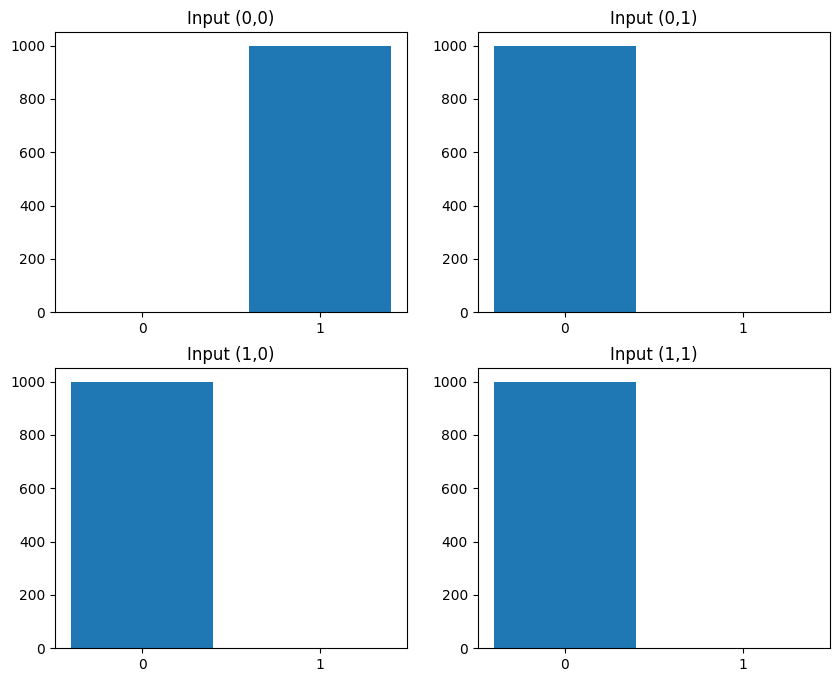

In [17]:
# Plot results:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
ax = [[x,y] for x in [0,1] for y in [0,1]]

for i in range(4):
    # Plot histograms
    axs[ax[i][0], ax[i][1]].bar(xor_counts[i][0], xor_counts[i][1])
    axs[ax[i][0], ax[i][1]].set_title(f'Input ({ax[i][0]},{ax[i][1]})')

# Show plot
plt.show()

# Example 2:

## Quantum Circuit:

     ┌───┐┌────────┐┌───┐┌─┐
  q: ┤ H ├┤ P(π/4) ├┤ H ├┤M├
     └───┘└────────┘└───┘└╥┘
c: 1/═════════════════════╩═
                          0 


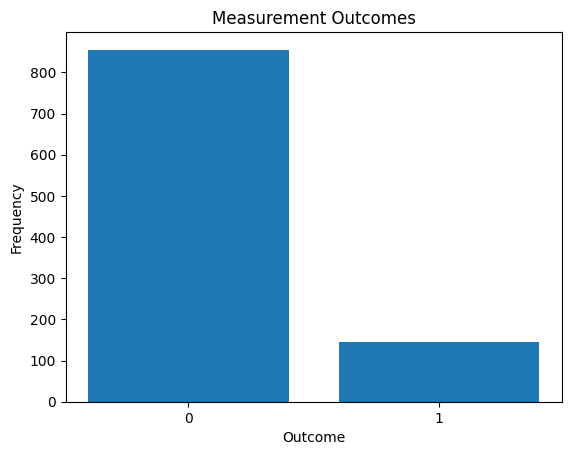

In [2]:
qc_HTH()

## Magic state injection

     ┌───┐                   ┌────────┐┌───┐┌─┐
q_0: ┤ H ├────────────■──────┤ P(π/2) ├┤ H ├┤M├
     ├───┤┌────────┐┌─┴─┐┌─┐ └───╥────┘└───┘└╥┘
q_1: ┤ H ├┤ P(π/4) ├┤ X ├┤M├─────╫───────────╫─
     └───┘└────────┘└───┘└╥┘┌────╨────┐      ║ 
c: 1/═════════════════════╩═╡ c_0=0x1 ╞══════╩═
                          0 └─────────┘      0 


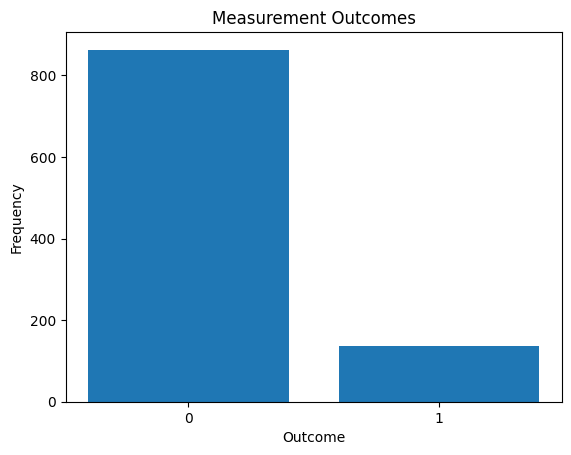

In [4]:
qc_magic_HTH()

## CNC Magic Simulation

In [3]:
r = 1/np.sqrt(2); T = np.array([1,r,0,r]); Zero = np.array([1,0,0,1])
QuantumState = np.kron(Zero,T)

In [4]:
# Single qubit cnc operators
A000 = np.array([1,1,1,1])
A010 = np.array([1,1,-1,1])
A101 = np.array([1,-1,1,-1])
# Can check that these are CNC operators:
CNC.from_pauli_basis_representation(A000)

CNC(n=1 with 4 Pauli operators)

In [5]:
# Decomposition of T-state:
T_prime = (1/2)*(r*A000+A010+(1-r)*A101)
# Check that this works:
set(T) == set(T_prime)

True

In [6]:
# For Magic State injection we require the following state:
ZeroT = np.kron(Zero,T)

In [20]:
# Our input state can be decomposed using the following CNC operators:
ZeroA000 = np.kron(Zero,A000)
ZeroA010 = np.kron(Zero,A010)
ZeroA101 = np.kron(Zero,A101)
# We can check that this decomposition works:
ZeroT_prime = (1/2)*(r*ZeroA000+ZeroA010+(1-r)*ZeroA101)
set(ZeroT) == set(ZeroT_prime)

True

In [ ]:
#counts_cnc = simulate_from_distribution(
#    initial_distribution, [Pauli('IX')], shots
#)
#counts_cnc = simulate_from_distribution(
#    initial_distribution, [Pauli('IX')], shots
#)

In [30]:
# CNC operators in support:
CNC1 = CNC.from_pauli_basis_representation(ZeroA000)
CNC2 = CNC.from_pauli_basis_representation(ZeroA010)
CNC3 = CNC.from_pauli_basis_representation(ZeroA101)

In [31]:
# Initialize simulation:
initial_distribution = {(CNC1): r/2, CNC2: 0.5, CNC3: (1-r)/2}
#measurements = [[Pauli('IX'),Pauli('ZX')],[Pauli('XZ'),Pauli('IX')]]
measurements = [[Pauli('XZ'),Pauli('ZX')],[Pauli('IY')]]
shots = 1000
outcome_counts = [simulate_from_distribution(initial_distribution, measurements[m], shots) for m in range(len(measurements))]

ValueError: The value assignment image must be a subset of {0,1}.

In [79]:
outcome_counts

[{'00': 412, '01': 87, '10': 436, '11': 65},
 {'00': 434, '01': 71, '10': 84, '11': 411}]

In [62]:
# Plot the outcomes
plt.bar(outcome_counts.keys(), outcome_counts.values())
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Measurement Outcomes')
plt.show()

AttributeError: 'list' object has no attribute 'keys'

In [76]:
outcome_counts

[{'00': 440, '01': 66, '10': 422, '11': 72},
 {'00': 233, '01': 254, '10': 248, '11': 265}]

In [56]:
406/(406+74)

0.8458333333333333

In [57]:
74/(406+74)

0.15416666666666667